# **Aprendizado de Máquina** <BR> **Aula 07** - Problemas de agrupamento - Parte 1

# **Exercício 1**. Agrupamento no *dataset Iris* com o algoritmo *K-Means*

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1)** Importação de bibliotecas e classes

In [125]:
# Bibliotecas de cálculo, manipulação de dados e geração de gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# Bibliotecas específicas de Machine Learning
from sklearn.preprocessing import StandardScaler    # Padronização de atributos

## **2)** Leitura de dados e exploração inicial

In [127]:
# Leitura do arquivo de dados e exibição do DataFrame
# ATENÇÃO: "monte" o disco e ajuste o caminho do arquivo de dados!
caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula Machine Learn/A05EXEMPLO1_iris.csv"

df = pd.read_csv(caminho_arquivo)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


### **2.1)** Gráficos

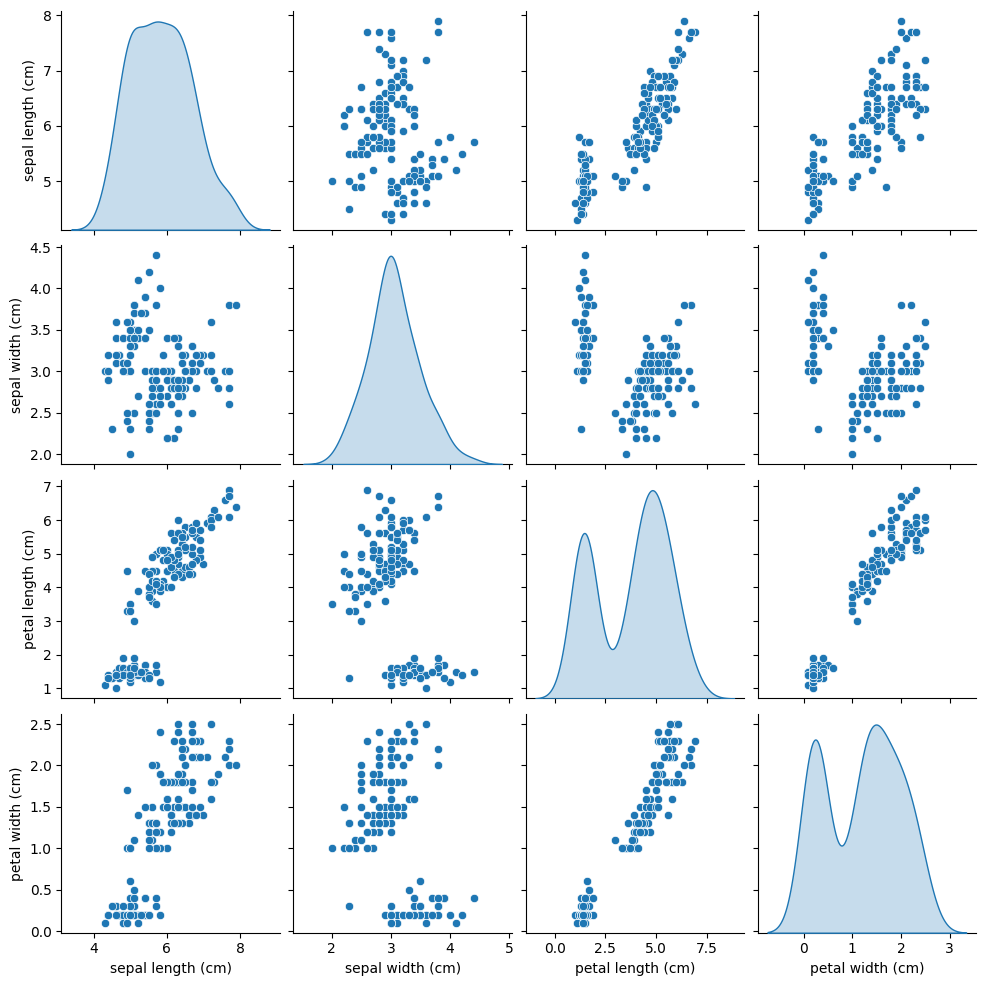

In [128]:
# Matriz de diagramas de dispersão (ignorando a rotulação)
sns.pairplot(data = df.drop(columns = ['target', 'species']), diag_kind = 'kde')
plt.show()

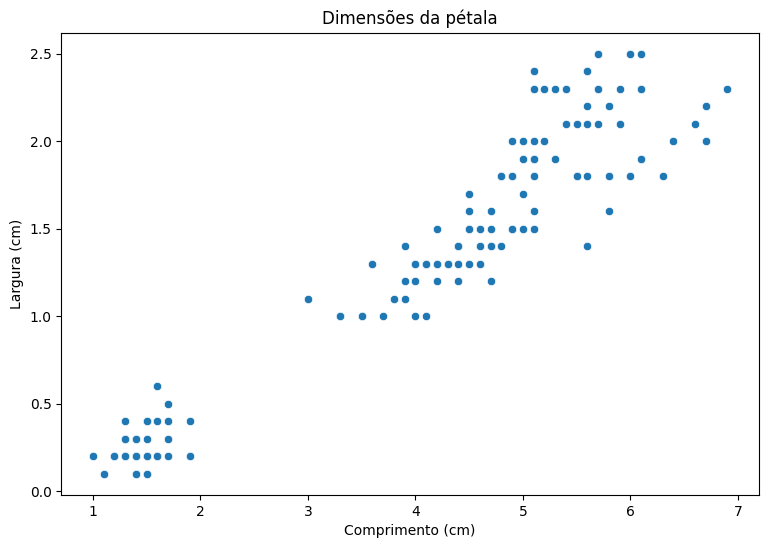

In [129]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)')
plt.show()

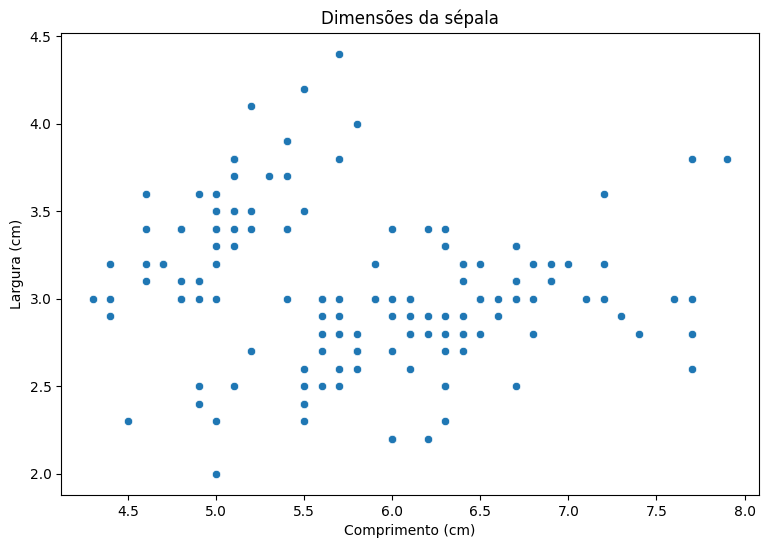

In [130]:
# Diagrama de dispersão entre comprimento e largura da sépala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)')
plt.show()

## **3)** Seleção e pré-processamento de variáveis

In [131]:
# Recordando os nomes das colunas do DataFrame
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [132]:
# Atributos: 4 dimensões das flores
X = df.drop(columns = ['target','species'])

In [133]:
# Pré-processamento ÚNICO: padronização dos atributos do CONJUNTO COMPLETO DE DADOS
escalonador = StandardScaler()      # Cria instância de objeto "escalonador"
escalonador.fit(X)                  # Calcula a média e a variância dos atributos
X_Padr = escalonador.transform(X)   # Padroniza os dados

## **4)** Agrupamento via algoritmo *K-Means*

### **4.1)** Treinamento do *clusterizador*

In [134]:
# Importação da biblioteca necessária para o uso do
# algoritmo de agrupamento (clusterização) K-Means
from sklearn.cluster import KMeans

In [135]:
# PRIMEIRA TENTATIVA:
# Criação de instância e treinamento do
# clusterizador K-Means, com K = 2 (padrão = 8)
clt_KMeans = KMeans(n_clusters = 2)
clt_KMeans.fit(X_Padr)

KMeans(n_clusters=2)

### **4.2)** Resultados do agrupamento

In [136]:
print("Atributos (coordenadas) dos centroides:")
print(clt_KMeans.cluster_centers_)

Atributos (coordenadas) dos centroides:
[[-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 0.50728948 -0.42663134  0.65249366  0.62744675]]


In [137]:
print("Rótulos dos elementos:")
print(clt_KMeans.labels_)

Rótulos dos elementos:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [138]:
print("Rótulos atribuídos:",np.unique(clt_KMeans.labels_))

Rótulos atribuídos: [0 1]


In [139]:
print("Total de elementos por cluster:")
print(pd.Series(clt_KMeans.labels_).value_counts())

Total de elementos por cluster:
1    100
0     50
Name: count, dtype: int64


In [140]:
print("Inércia do agrupamento (soma das inércias dos clusters):")
print(clt_KMeans.inertia_)

Inércia do agrupamento (soma das inércias dos clusters):
222.36170496502294


### **4.3)** Gráficos

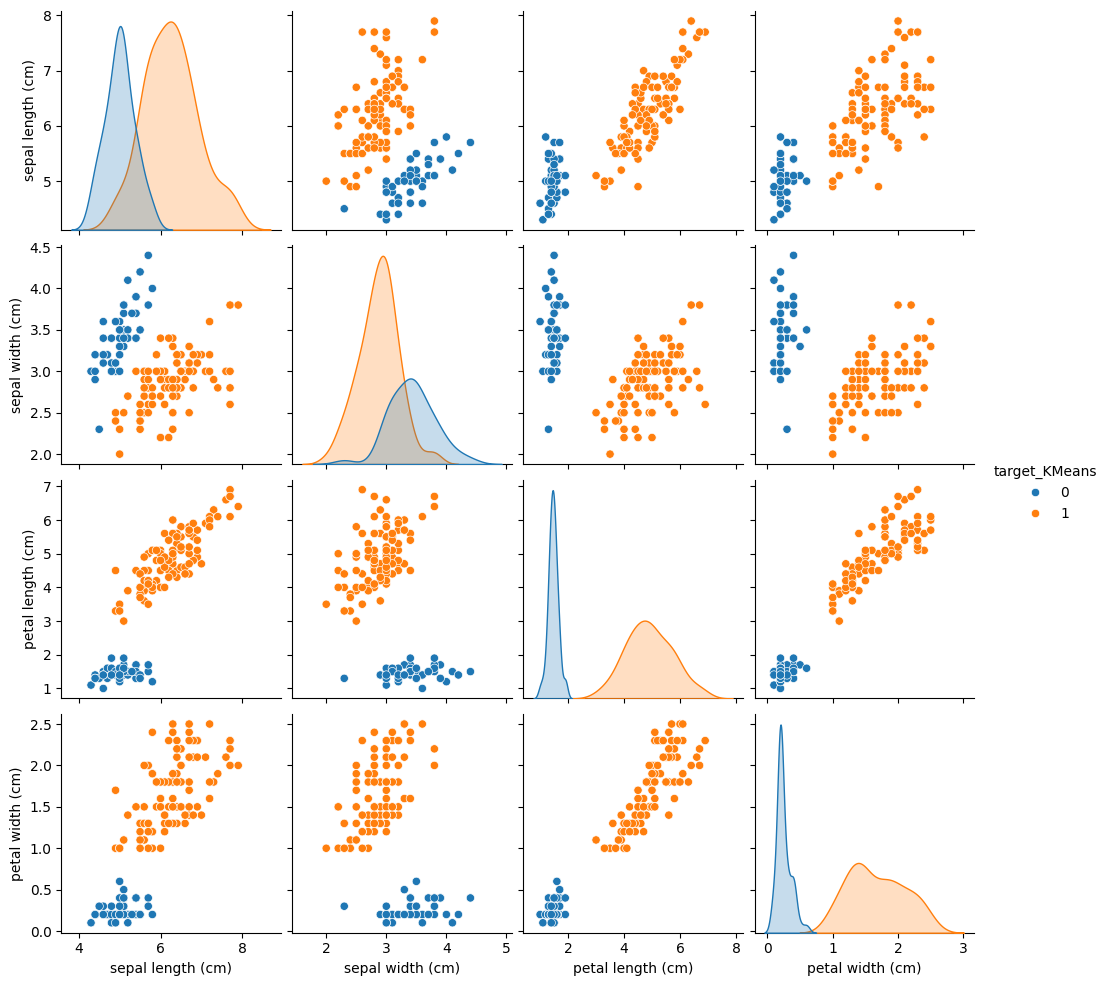

In [141]:
# Matriz de diagramas de dispersão, com separação de cor de acordo
# com a rotulação definida pelo clusterizador

# Atribuição dos rótulos de cluster/cor ao DataFrame
df['target_KMeans'] = clt_KMeans.labels_

sns.pairplot(data = df.drop(columns = ['target', 'species']),
             diag_kind = 'kde', hue = 'target_KMeans')
plt.show()

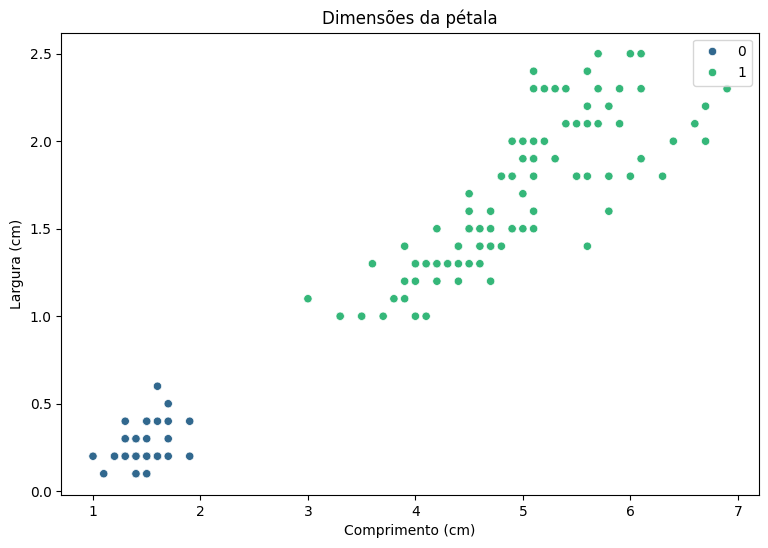

In [142]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)',
                hue = clt_KMeans.labels_, palette = 'viridis')
plt.show()

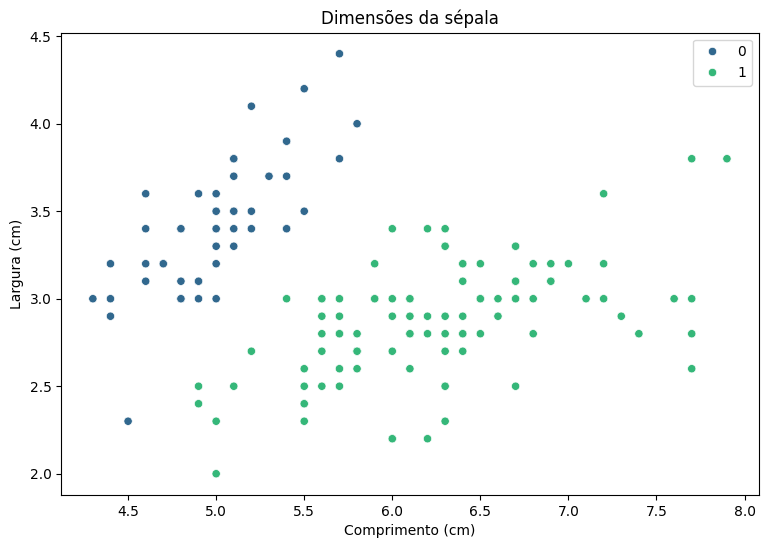

In [143]:
# Diagrama de dispersão entre comprimento e largura da sépala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)',
                hue = clt_KMeans.labels_, palette = 'viridis')
plt.show()

### **4.4)** Número "ideal" de grupos: <u>método do cotovelo</u>

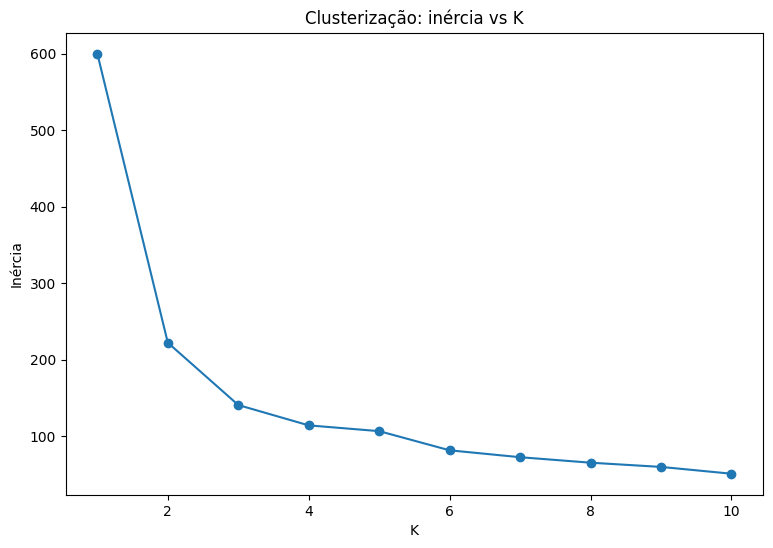

In [144]:
# Cálculo da inércia para valores de K de 1 a 10
Lista_inercia = []      # Inicia lista de valores da inércia
for k in range(1,11):   # Hiperparâmetro K varia de 1 a 10
  clt_KMeans = KMeans(n_clusters = k)   # Cria instância do clusterizador
  clt_KMeans.fit(X_Padr)                # Treina o clusterizador com valor atual de K
  Lista_inercia.append(clt_KMeans.inertia_)   # Acrescenta a inércia atual à lista

# Resultado gráfico
plt.figure(figsize = (9,6))
plt.plot(range(1,11), Lista_inercia, marker = 'o')
plt.title("Clusterização: inércia vs K")
plt.xlabel("K")
plt.ylabel("Inércia")
plt.show()

In [145]:
# Abordagem matemática: cotovelo = ponto de curvatura máxima!
# Instalação de biblioteca para detecção do joelho/cotovelo
# Descrição do projeto: https://pypi.org/project/kneed/
!pip install kneed

Cotovelo em x = 3
Inércia associada = 140.90153181202442



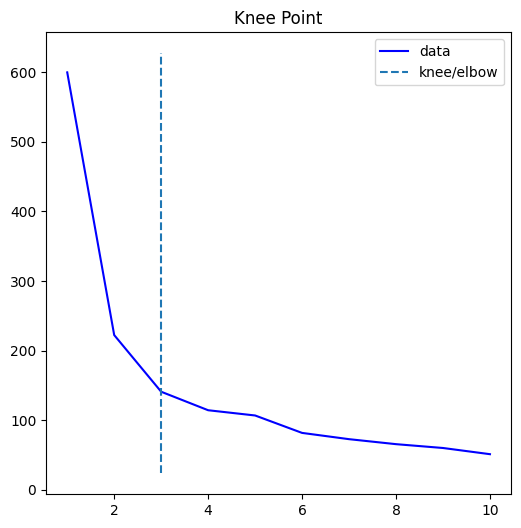

In [146]:
# Importação e aplicação da função de detecção
from kneed import KneeLocator

cotovelo = KneeLocator(x = range(1,11), y = Lista_inercia,
                       S = 1.0, curve = "convex",
                       direction = "decreasing",
                       online = True)

print("Cotovelo em x =",cotovelo.elbow)        # Opção: objeto.knee
print("Inércia associada =",cotovelo.elbow_y)  # Opção: objeto.knee_y
print("")   # Pula uma linha

# Exibição gráfica do resultado
cotovelo.plot_knee()
plt.show()

### **4.5)** Agrupamento final

In [147]:
# Treinamento do clusterizador K-Means, com K = ???
# Criação de instância e treinamento do clusterizador
clt_KMeans = KMeans(n_clusters = 3)
clt_KMeans.fit(X_Padr)

KMeans(n_clusters=3)

### **4.6)** Gráficos finais

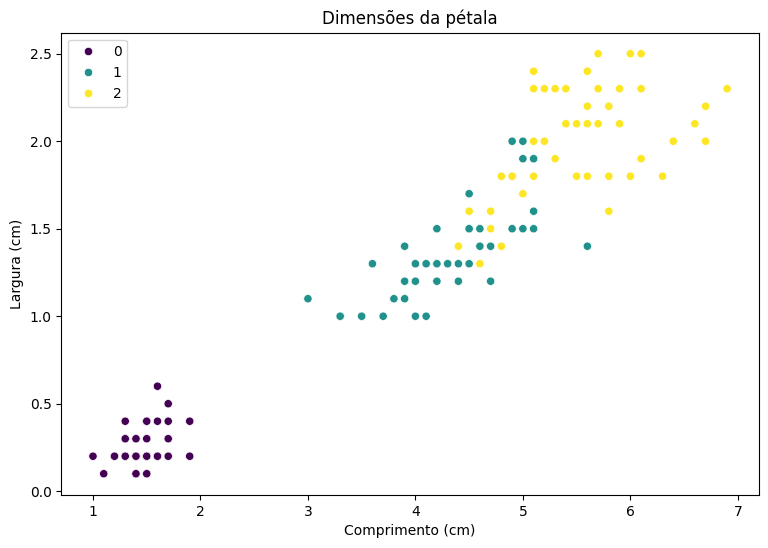

In [148]:
# Diagrama de dispersão entre comprimento e largura da pétala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'petal length (cm)', y = 'petal width (cm)',
                hue = clt_KMeans.labels_, palette = 'viridis')
plt.show()

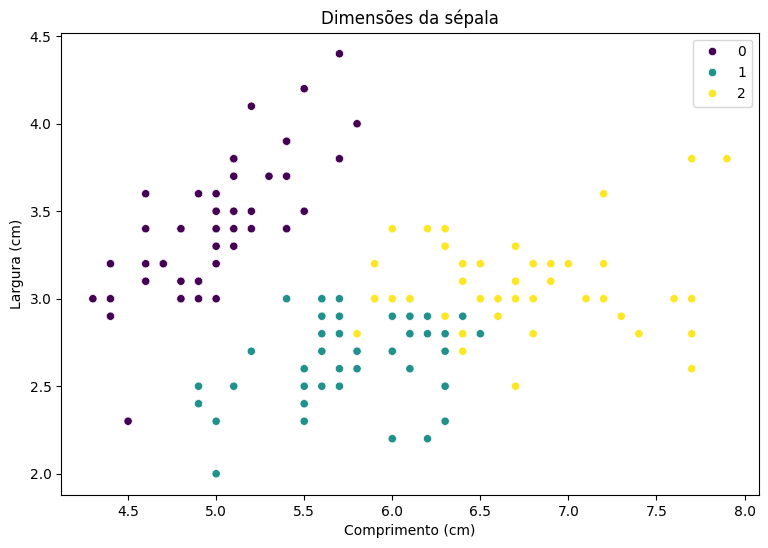

In [149]:
# Diagrama de dispersão entre comprimento e largura da sépala
# Ajustes da figura
# Tamanho do gráfico (polegadas): largura = 9, altura = 6
plt.figure(figsize = (9,6))

# Título e rótulos dos eixos
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")

sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)',
                hue = clt_KMeans.labels_, palette = 'viridis')
plt.show()

---
**Fim do Exercício 1 da Aula 07**